# Assignment 2: Machine Learning

## Predict stock market price for Tesla

In [233]:
#Importing necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [234]:
#Import data
url='TSLA.csv'
df = pd.read_csv(url)

#Check if there are som NaN
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [235]:
#Check Data 
df.head()
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3.359000e+03
mean,68.452214,69.974238,66.812905,68.428702,68.428702,9.652097e+07
std,100.458809,102.723203,97.965926,100.373623,100.373623,8.046320e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,10.228333,10.516000,9.952666,10.163334,10.163334,4.551450e+07
50%,16.804001,17.049999,16.566668,16.815332,16.815332,8.051580e+07
75%,69.859333,74.100666,69.474335,73.314667,73.314667,1.231410e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


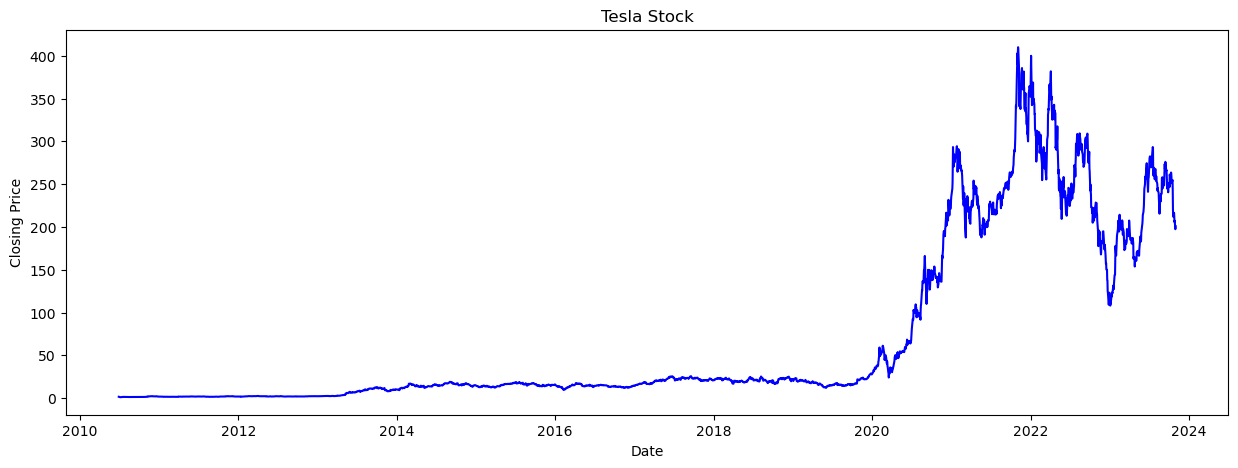

In [244]:
#Visualize the Tesla stock
plt.figure(figsize=(15,5))
plt.plot(df['Date'],df['Close'],label='Actual', color = 'Blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock')
plt.show()

### Train & Test  Data

In [237]:
# Convert 'Date' column to datetime format and reset the index
df = df.reset_index(drop=True) 
df['Date'] = pd.to_datetime(df['Date'])

earliest_date = min(df['Date'])

# Calculate number of days since the earliest sample in the dataframe
df['Days'] = (df['Date'] - pd.Timestamp(earliest_date)).dt.days

In [238]:
#Split up into target variable and Feature matrix
#and reshaping the values to fit the scalers
X = df['Days'].values.reshape(-1,1)
y = df['Close'].values

In [239]:
#Standardizing the train set and the test set.
#Using two separate scaler objects for the train set and the test set
#to ensure that the train and test data is completely separated.
scaler_train = preprocessing.StandardScaler().fit(X)
X_scaled = scaler_train.transform(X)

In [240]:
#Splits the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

### XGBoost

In [241]:
#Create and train XGB model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=0)

#Precision of the model
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE : % f" %(rmse))


RMSE :  6.915678


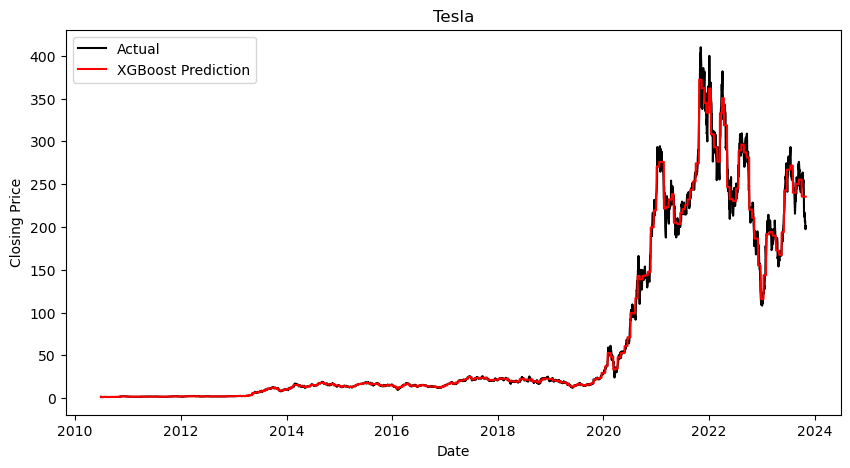

In [242]:
# Visualize the XGBoost regression model
y_pred = xgb_model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['Close'],label='Actual', color='Black')
plt.plot(df['Date'],y_pred,color = 'Red', label='XGBoost Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla')
plt.legend()
plt.show()

In [243]:
# Prediction for given date
predictionDateStr = "2023-01-03"
predictionDate = pd.to_datetime(predictionDateStr)

# Days from first stock data
daysFromStart = (predictionDate - earliest_date).days

# Latest day in data frame
latestDay = max(df['Days'])

# Get Close value for the specific day
predictionColumn = df[df['Date'] == predictionDate]
if not predictionColumn.empty:
    predictionCloseValue = predictionColumn['Close'].values[0]
else:
    predictionCloseValue = False

# Using xgb model to predict close value for given date
predictedClose = xgb_model.predict([daysFromStart])[0]

# Calculate predicted percentage score
predictedPercentage = round((predictionCloseValue/predictedClose * 100), 2)

# Print predicted price for given date
if daysFromStart <= latestDay and daysFromStart > 0: 
    print(f"Predicted price for {predictionDateStr}: ${predictedClose}")

# Print actual price for given date if there's data for that day
if predictionCloseValue:
    print(f"Actual price for {predictionDateStr}: ${predictionCloseValue}")
    print(f"Predicted percentage score: {predictedPercentage}%" )
else:
    print(f"No Actual Price for {predictionDateStr}")

Predicted price for 2023-01-03: $115.71612548828125
Actual price for 2023-01-03: $108.099998
Predicted percentage score: 93.42%


### Summary

XGBoost regression, for eXtreme Gradient Boosting, employs a boosting strategy within an ensemble machine learning framework to forecast a continuous dependent variable. This method enhances gradient-boosted decision trees, focusing on swift execution and high predictive accuracy.

At first, we used linear regression, but the MSE value was too high. Consequently, we divided our team into two subgroups: one focused on deploying polynomial regression, while the other concentrated on XGBoost. Upon examining the results visually, we determined that XGBoost generated the most accurate predictions.